# Visualize a_kj

In [26]:
import numpy as np


In [8]:
def generate_a_kj(len_premise, len_hypothesis):
    """
    debug purpose generation. 
    """
    a_kj = np.random.rand(1, len_hypothesis, len_premise)
    for i in range(a_kj.shape[1]): # make the sum over 3 dimension is 1. This is output of softmax.
        a_kj[0, i, :] = a_kj[0, i, :] / np.sum(a_kj[0, i, :])
        
    return a_kj

premise_tokens = "I am hungry now NULL".split(" ")
hypothesis_tokens = "I want to eat something now".split(" ")

a_kj = generate_a_kj(len(premise_tokens), len(hypothesis_tokens)) # [batch_size, timestep, length_of_premise]

# Assume batch_size is 1
print(a_kj)


[[[ 0.28608917  0.01047886  0.11411725  0.38979238  0.19952233]
  [ 0.23151208  0.16018462  0.20582266  0.19809723  0.20438341]
  [ 0.22897231  0.31821282  0.20926581  0.19401342  0.04953564]
  [ 0.08542506  0.22448726  0.17670935  0.23036137  0.28301696]
  [ 0.05370158  0.0111107   0.1602793   0.39931464  0.37559378]
  [ 0.08907094  0.64367337  0.09784334  0.03193569  0.13747666]]]


In [85]:
# Load the actual values from model inference

import pickle 
data_out_filename = "../forward_data.pkl"
batch_data = pickle.load(open(data_out_filename, "rb"))
print(batch_data)

{'x': [[['What', 'should', 'I', 'do', 'to', 'avoid', 'sleeping', 'in', 'class', '?'], ['Do', 'women', 'support', 'each', 'other', 'more', 'than', 'men', 'do', '?'], ['How', 'can', 'one', 'root', 'android', 'devices', '?'], ['How', 'did', 'Hitler', 'come', 'to', 'power', '?'], ['Can', 'we', 'donate', 'blood', 'after', 'getting', 'a', 'tattoo', '?'], ['What', 'are', 'reviews', 'for', 'the', 'BioVault', '2.0', 'Biometric', 'gun', 'safe', '?'], ['Now', 'Donald', 'Trump', 'is', 'the', 'President', 'of', 'US', ',', 'What', 'is', 'the', 'impact', 'on', 'India', '?'], ['Who', 'is', 'owner', 'of', 'oyeshop.com', '?'], ['What', 'are', 'the', 'best', 'was', 'to', 'lose', 'weight', '?'], ['Why', 'is', 'a', 'MAACO', 'paint', 'job', 'so', 'cheap', '?'], ['What', '', "'", 's', 'the', 'best', 'way', 'to', 'learn', 'Microsoft', 'Office', 'and', 'its', 'associated', 'packages', '?'], ['What', 'kind', 'of', 'fruit', 'is', 'this', '?'], ['What', 'do', 'people', 'think', 'of', 'new', 'MacBook', 'Pro', 'wit

In [86]:
# select single data point
def get_datapoint(batch_data, batch_idx, point_idx):
    premise_tokens = batch_data['y'][batch_idx][point_idx]
    premise_tokens.append('NULL')
    hypothesis_tokens = batch_data['x'][batch_idx][point_idx]
    a_kj = batch_data['alignment_att'][batch_idx][point_idx]
    a_kj = a_kj[:len(hypothesis_tokens), :len(premise_tokens)]
    logits = batch_data['logits'][batch_idx][point_idx]
    z = batch_data['z'][batch_idx][point_idx]
    return premise_tokens, hypothesis_tokens, a_kj, logits, z




(14, 10)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


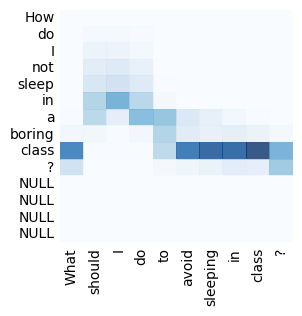

(11, 10)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: Duplicates
Incorrect


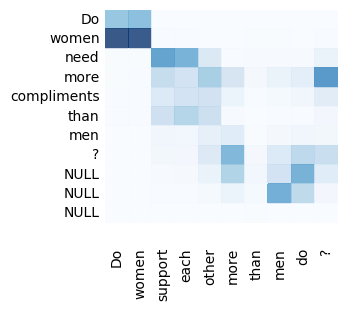

(10, 7)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


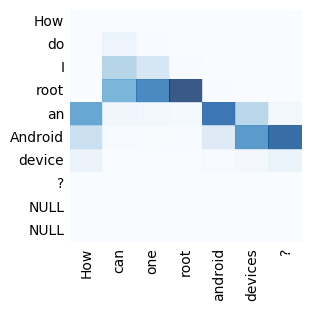

(8, 7)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: No duplicates
Correct


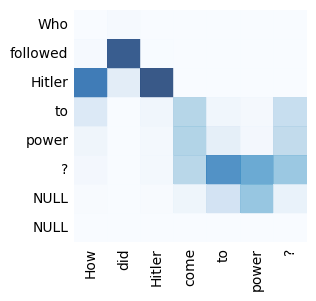

(12, 9)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


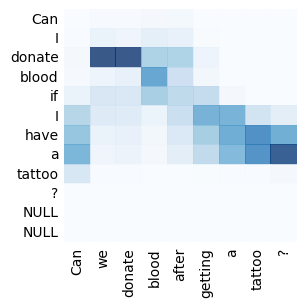

(14, 11)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: No duplicates
Correct


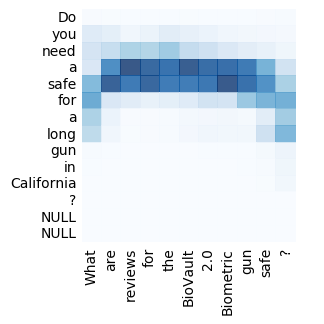

(13, 16)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


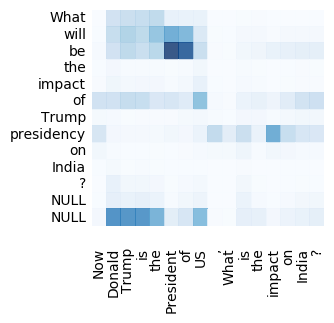

(9, 6)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: No duplicates
Correct


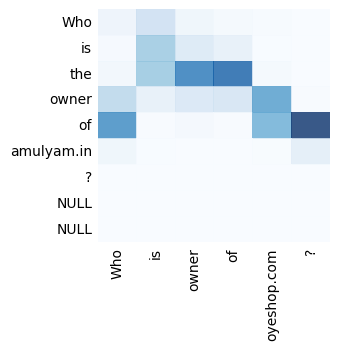

(8, 9)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


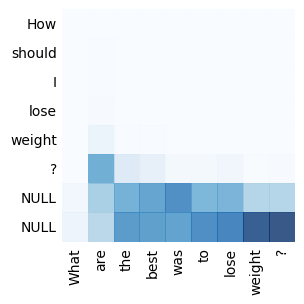

(25, 9)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: No duplicates
Correct


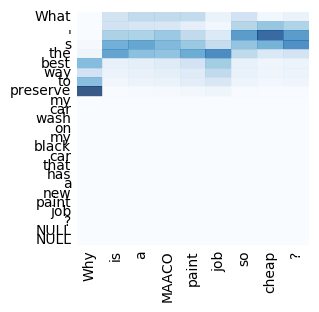

(11, 16)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


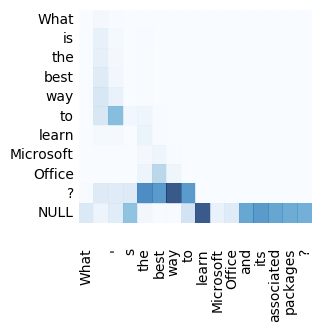

(9, 7)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: No duplicates
Correct


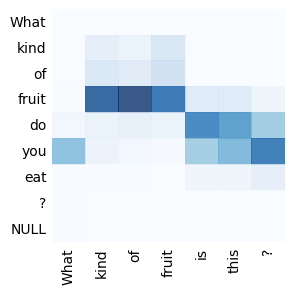

(15, 12)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


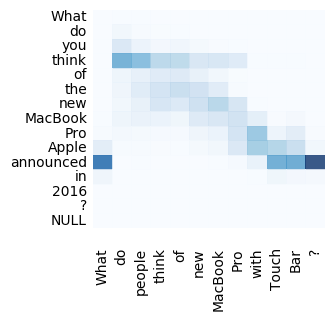

(31, 23)
True label [no_dup, dup]: No duplicates
Pred label [no_dup, dup]: No duplicates
Correct


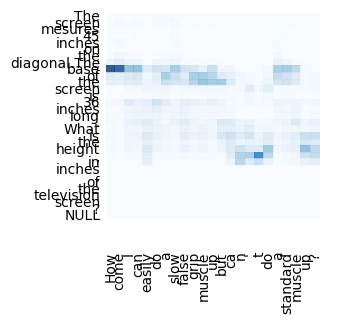

(14, 7)
True label [no_dup, dup]: Duplicates
Pred label [no_dup, dup]: Duplicates
Correct


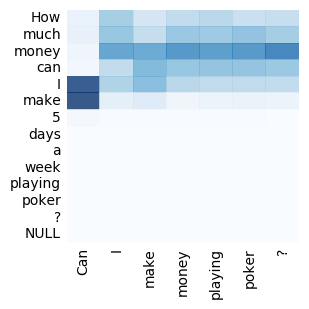

In [91]:

import matplotlib.pyplot as plt



def visualize(batch_idx, point_idx):
    premise_tokens, hypothesis_tokens, a_kj, logits, z = get_datapoint(batch_data, batch_idx, point_idx)

    attention = a_kj.T
    print(attention.shape)

    print("True label [no_dup, dup]:", "No duplicates" if np.argmax(z) == 0 else "Duplicates")
    print("Pred label [no_dup, dup]:", "No duplicates" if np.argmax(logits) == 0 else "Duplicates")
    print("Correct" if np.argmax(logits) == np.argmax(z) else "Incorrect")

    # Plot it out
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(attention, cmap=plt.cm.Blues, alpha=0.8)

    # Format
    fig = plt.gcf()
    fig.set_size_inches(3, 3)

    # turn off the frame
    ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(attention.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(attention.shape[1]) + 0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    # ax.xaxis.tick_top()

    # Set the labels

    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(hypothesis_tokens, minor=False)
    ax.set_yticklabels(premise_tokens, minor=False)

    # rotate the
    plt.xticks(rotation=90)

    ax.grid(False)

    # Turn off all the ticks
    ax = plt.gca()


    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    plt.show()
    
for i in range(0, 15):
    batch_idx, point_idx = 0, i
    visualize(batch_idx, point_idx)
